<a href="https://colab.research.google.com/github/doguedogue/pythonic-colab/blob/main/rva_dane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pythonic - Colab - DANE

## Aula 3


### Carga google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Cargando archivo de datos

SRC = https://microdatos.dane.gov.co/index.php/catalog/743/get-microdata

In [2]:
import pandas as pd

datos_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Identificación (Capítulo A).csv', sep=';', encoding='latin-1')

datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


### Contar los registros

In [3]:
datos_raw.shape

(106467, 11)

### Extrayendo solo del municipio de Bogotá

In [4]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

### Carga otro archivo con información relacionada

In [5]:
datos_b = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos de la vivenda y su entorno (Capítulo B).csv', sep=';', encoding='latin-1')

### Información cargada en datos_b

In [6]:
datos_b.head(5)

,DIRECTORIO,NVCBP1,NVCBP2,NVCBP3,NVCBP4,NVCBP5,NVCBP6,NVCBP7,NVCBP8A,NVCBP8B,...,NVCBP15J,NVCBP15K,NVCBP15L,NVCBP15M,NVCBP16A1,NVCBP16A2,NVCBP16A3,NVCBP16A4,NVCBP16,FEX_C
0,3005117.0,4,1.0,1,1,1,12,1.0,2,2,...,2,2,2,2,1,1,1,1,1,"19,5771388808791"
1,3005118.0,2,1.0,1,2,1,5,2.0,2,2,...,2,2,2,2,1,1,1,1,1,"11,3314401226775"
2,3005119.0,1,NaN,1,2,1,1,NaN,2,2,...,2,2,2,2,2,2,2,2,1,"5,67151636864259"
3,3005120.0,2,1.0,1,1,1,8,1.0,2,2,...,2,2,2,2,1,1,1,1,1,"5,47075697554425"
4,3005121.0,4,1.0,1,2,1,6,2.0,1,2,...,2,2,2,2,1,1,1,1,1,"16,8447673879615"


### Merge de la información obtenida con la primer carga (datos_raw)
Haciendo una especie de left join
pivote el campo DIRECTORIO

In [7]:
datos_dane = pd.merge(datos_raw, datos_b,on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

### Verificando la información total cargada
NOTA: validar siempre la memory usage: 48.8+ MB

In [8]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86504 entries, 0 to 86503
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        86504 non-null  float64
 1   DPTO              86504 non-null  int64  
 2   MPIO              86504 non-null  int64  
 3   CLASE             86504 non-null  int64  
 4   COD_LOCALIDAD     86504 non-null  float64
 5   NOMBRE_LOCALIDAD  86504 non-null  object 
 6   COD_UPZ_GRUPO     83736 non-null  float64
 7   NOMBRE_UPZ_GRUPO  83736 non-null  object 
 8   ESTRATO2021       86504 non-null  int64  
 9   NOMBRE_ESTRATO    86504 non-null  object 
 10  FEX_C_x           86504 non-null  object 
 11  NVCBP1            86504 non-null  int64  
 12  NVCBP2            78357 non-null  float64
 13  NVCBP3            86504 non-null  int64  
 14  NVCBP4            86504 non-null  int64  
 15  NVCBP5            86504 non-null  int64  
 16  NVCBP6            86504 non-null  int64 

### Desafio

1. Dar un vistazo a la base de datos del DANE, entender estas variables conceptualmente para entender mejor el contexto de esta base.
2. Organizar tu notebook para que tu proyecto quede mejor presentado.

## Aula 4

### Carga archivo depurado de info DANE

In [9]:
datos_dane = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_dane.csv')

datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


### Cantidad de registros

In [10]:
datos_dane.shape

(9857, 55)

### Información de los datos cargados

In [11]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


### Diccionario para renombrar las columnas

In [12]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

### Información de los datos cargados nuevamente


In [13]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

### Agrupar por NOMBRE_ESTRATO
Se agrega round a 2 decimales


In [14]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head().round(2)

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


### Sustituir el dos (2. No) por un cero

In [15]:
datos = datos_dane[['NOMBRE_ESTRATO', 'CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.0,1.0,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.0,1.0,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.0,1.0,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.0,1.0,0,1,0


### Buscando un barrio con un 2 (aunque el replace fue a nivel númerico no sobre texto)

In [16]:
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.0,1.0,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.0,1.0,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.0,1.0,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.0,1.0,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.0,1.0,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.0,1.0,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.0,1.0,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.0,1.0,0,0,1


### Promedio de los datos tratados
Se agrega round a 2 decimales

In [17]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head().round(2)
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06


### Carga de inmuebles en este libro

In [18]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmuebles_bogota.csv')
columnas = {'Baños': 'Banos', 'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)


valor = inmuebles.Valor.str.split(expand=True)

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.', '', regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000


pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']

datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])


inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)

inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


### Haciendo merge de la información de los inmuebles con las encuentas de DANE
NOTA: Sale la canción de batman NaN NaN :)

In [19]:
pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Se obtinen otra vez los datos tratados sin el head

In [20]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


### Ejecutando el merge nuevamente con todas las filas (sin head)

In [21]:
pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


### Se guardan en una valiable para machine learning

In [22]:
datos_ml = pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_Millon             9520 non-null   float64
 11  Valor_m2_Millon           9520 non-null   float64
 12  Valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

### Leyendo el archivo UPZ

In [23]:
upz = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cod_upz.csv')
upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


### Haciendo un merge para agregar el código de UPZ

In [24]:
datos_ml = pd.merge(datos_ml, upz, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


### Cantidad de registros

In [25]:
datos_ml.shape

(9318, 26)

### Mostrando columnas

In [26]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Millon             9318 non-null   float64
 11  Valor_m2_Millon           9318 non-null   float64
 12  Valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

### Gráficando la información

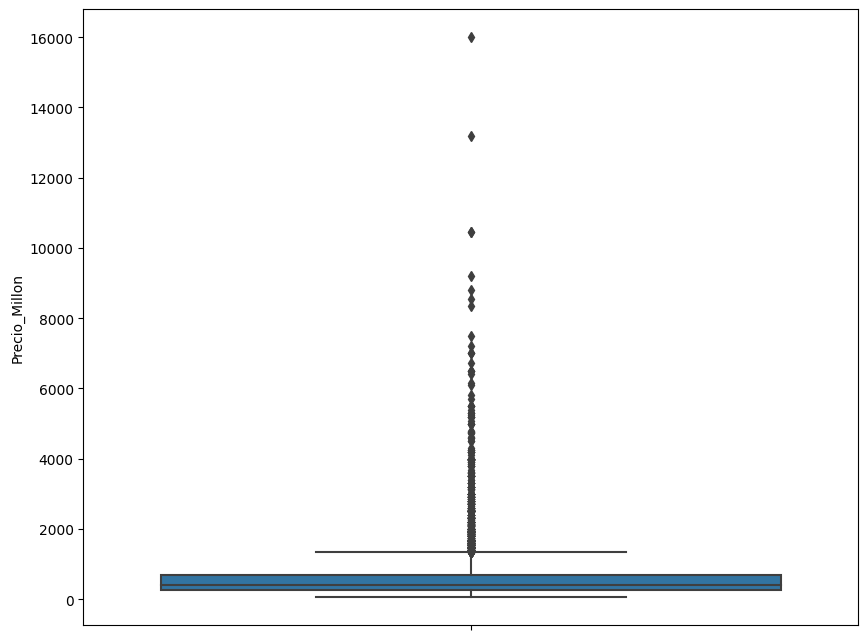

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

### Obteniendo los outliers

In [28]:
datos_ml.query('Precio_Millon > 5000 & Precio_Millon < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO


### Eliminando los outliers del modelo

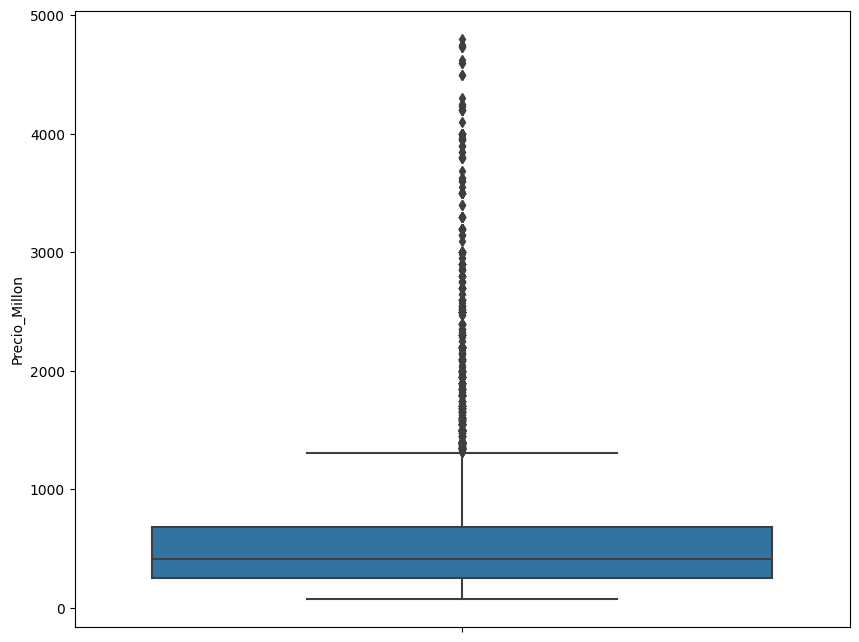

In [29]:
datos_ml = datos_ml.query('Precio_Millon < 5000 & Precio_Millon > 60')

plt.figure(figsize=(10, 8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

#### Salario anual

In [30]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES'] *12 / 1000000
datos_ml['SALARIO_ANUAL_MI']

0      48.42
1      48.42
2      48.42
3      48.42
4      48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 9277, dtype: float64

### Gráficando la información

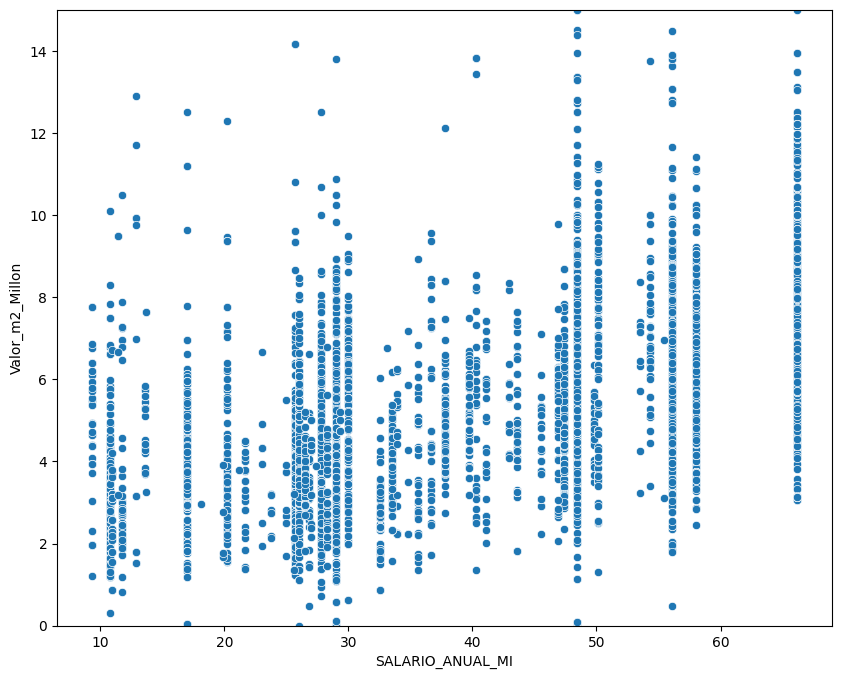

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=datos_ml, x = 'SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.ylim((0, 15))
plt.show()

### Mapa de Correlación

In [33]:
#  1 existe correlación 
#  0 ninguna correlación 
# -1 correlación inversa
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.48,0.03,0.22,-0.23,-0.18,-0.11,0.12,0.06,0.11,0.13,0.10,-0.15,-0.06,0.06,0.11,0.07,-0.09,-0.15
Banos,0.48,1.00,0.06,0.65,0.08,0.16,0.16,-0.19,-0.16,-0.08,-0.18,-0.20,0.20,0.12,-0.09,-0.15,-0.10,0.07,0.20
Area,0.03,0.06,1.00,0.05,-0.04,-0.03,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,-0.01,0.01,0.01,0.01,-0.00,-0.00
Precio_Millon,0.22,0.65,0.05,1.00,0.41,0.32,0.21,-0.26,-0.18,-0.09,-0.25,-0.23,0.32,0.11,-0.13,-0.22,-0.17,0.20,0.32
Valor_m2_Millon,-0.23,0.08,-0.04,0.41,1.00,0.50,0.32,-0.37,-0.27,-0.19,-0.36,-0.33,0.46,0.20,-0.20,-0.35,-0.22,0.27,0.46
Valor_m2_Barrio,-0.18,0.16,-0.03,0.32,0.50,1.00,0.64,-0.66,-0.37,-0.41,-0.66,-0.59,0.82,0.37,-0.31,-0.64,-0.25,0.41,0.82
CONJUNTO_CERRADO,-0.11,0.16,-0.01,0.21,0.32,0.64,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.04,0.09,0.80
INSEGURIDAD,0.12,-0.19,-0.01,-0.26,-0.37,-0.66,-0.84,1.00,0.50,0.60,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.01,-0.18,-0.27,-0.37,-0.29,0.50,1.00,0.38,0.66,0.57,-0.52,-0.29,0.18,0.35,0.26,-0.11,-0.52
BARES_DISCO,0.11,-0.08,-0.01,-0.09,-0.19,-0.41,-0.51,0.60,0.38,1.00,0.60,0.51,-0.38,-0.25,-0.02,0.33,-0.06,0.27,-0.38


### Gráfico de calor

DC: Correlaciones espurias son aquellas que no tienen relación entre si aunque parezca que si

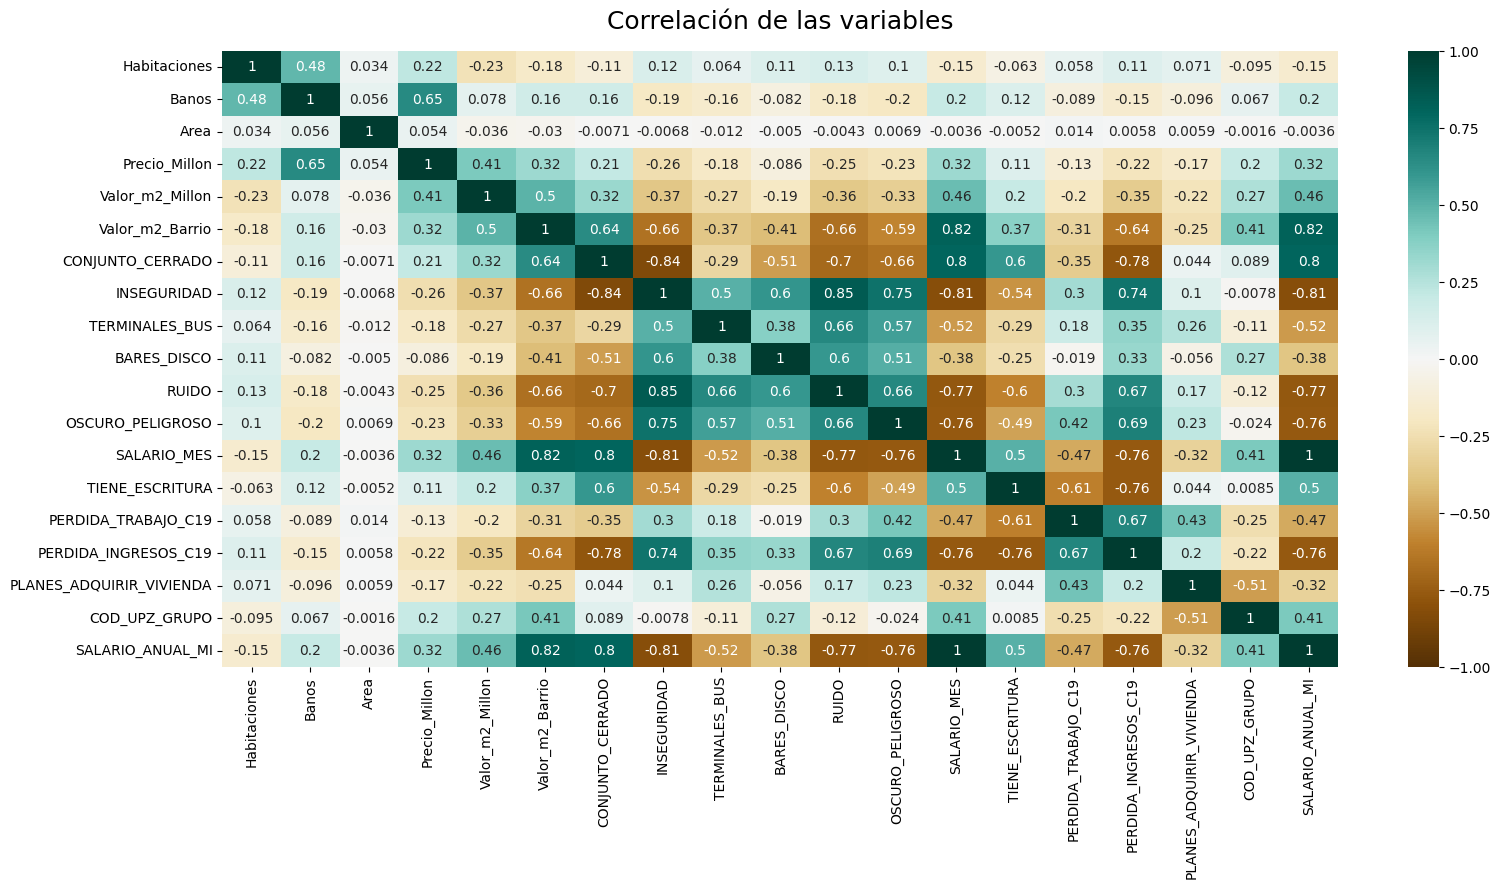

In [35]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);